<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/25_Keras_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *


In [14]:
x=Input(shape=(3,3))
hidden1=Dense(128,activation='relu')(x)
hidden2=Dense(128,activation='relu')(hidden1)

output1=Dense(1,activation='linear')(hidden2)
output2=Dense(1,activation='sigmoid')(hidden2)

In [15]:
model=Model(inputs=x,outputs=[output1,output2])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 3, 3)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3, 128)    │        512 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 3, 128)    │     16,512 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 3, 1)      │        129 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 3, 1)      │        129 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,282 (67.51 KB)

 Trainable params: 17,282 (67.51 KB)

 Non-trainable params: 0 (0.00 B)

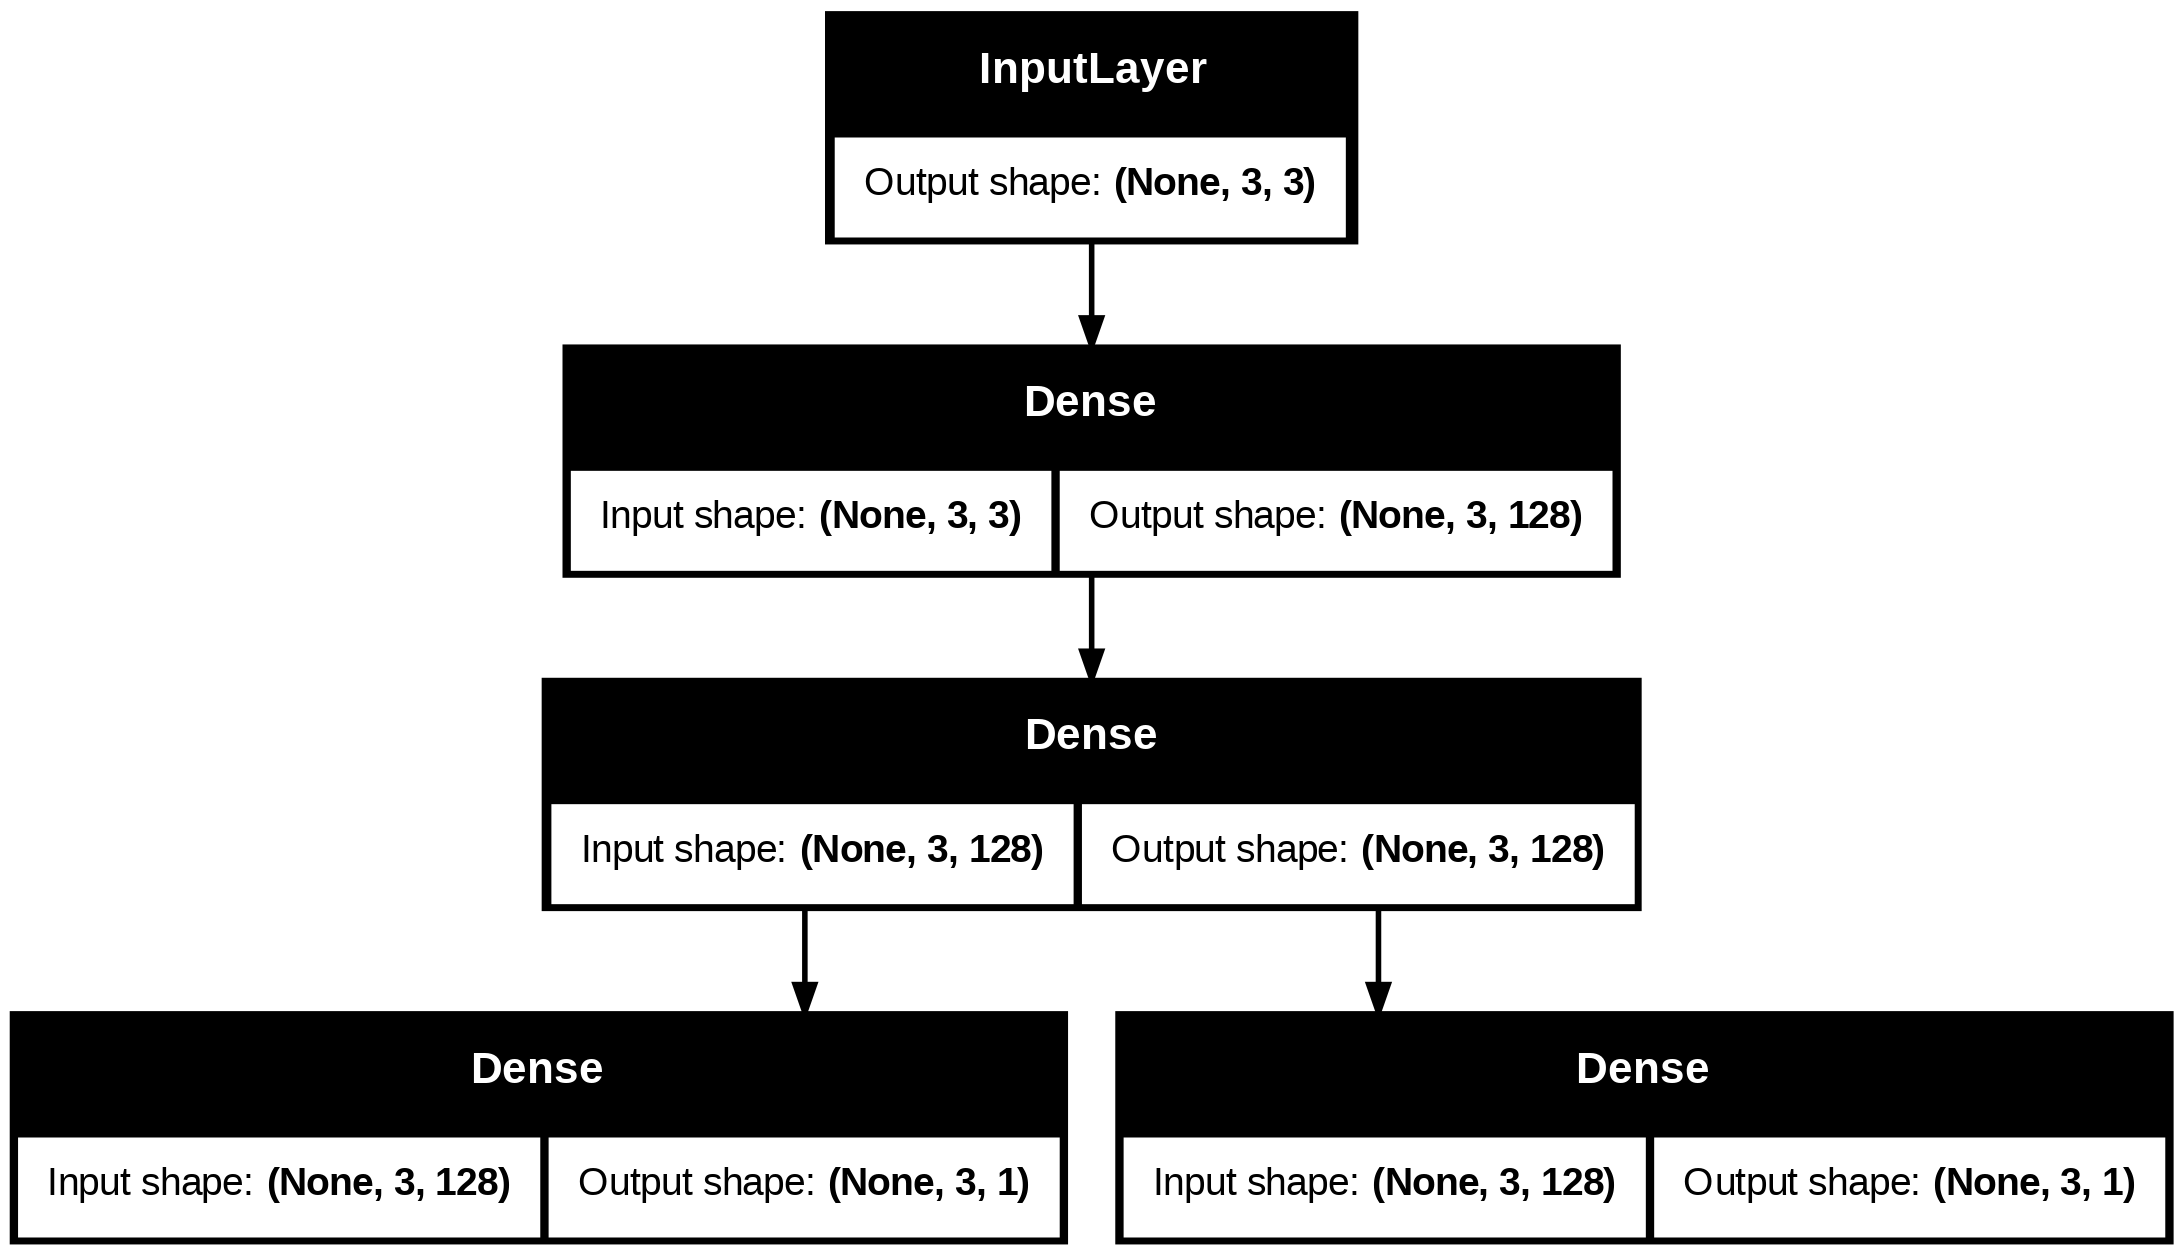

In [17]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [19]:
from keras.src.layers.merging.concatenate import concatenate
inputA=Input(shape=(3,3))
inputB=Input(shape=(3,3))

a1=Dense(128,activation='relu')(inputA)
a2=Dense(128,activation='relu')(a1)

b1=Dense(128,activation='relu')(inputB)
b2=Dense(128,activation='relu')(b1)

combined=concatenate([a2,b2])

z1=Dense(64,activation='relu')(combined)
z2=Dense(1,activation='sigmoid')(z1)

In [20]:
model=Model(inputs=[inputA,inputB],outputs=z2)

In [21]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 3, 3)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 3, 3)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 3, 128)    │        512 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 3, 128)    │        512 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 3, 128)    │     16,512 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 3, 128)    │     16,512 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 3, 256)    │          0 │ dense_14[0][0],   │
│ (Concatenate)       │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 3, 64)     │     16,448 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 3, 1)      │         65 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,561 (197.50 KB)

 Trainable params: 50,561 (197.50 KB)

 Non-trainable params: 0 (0.00 B)

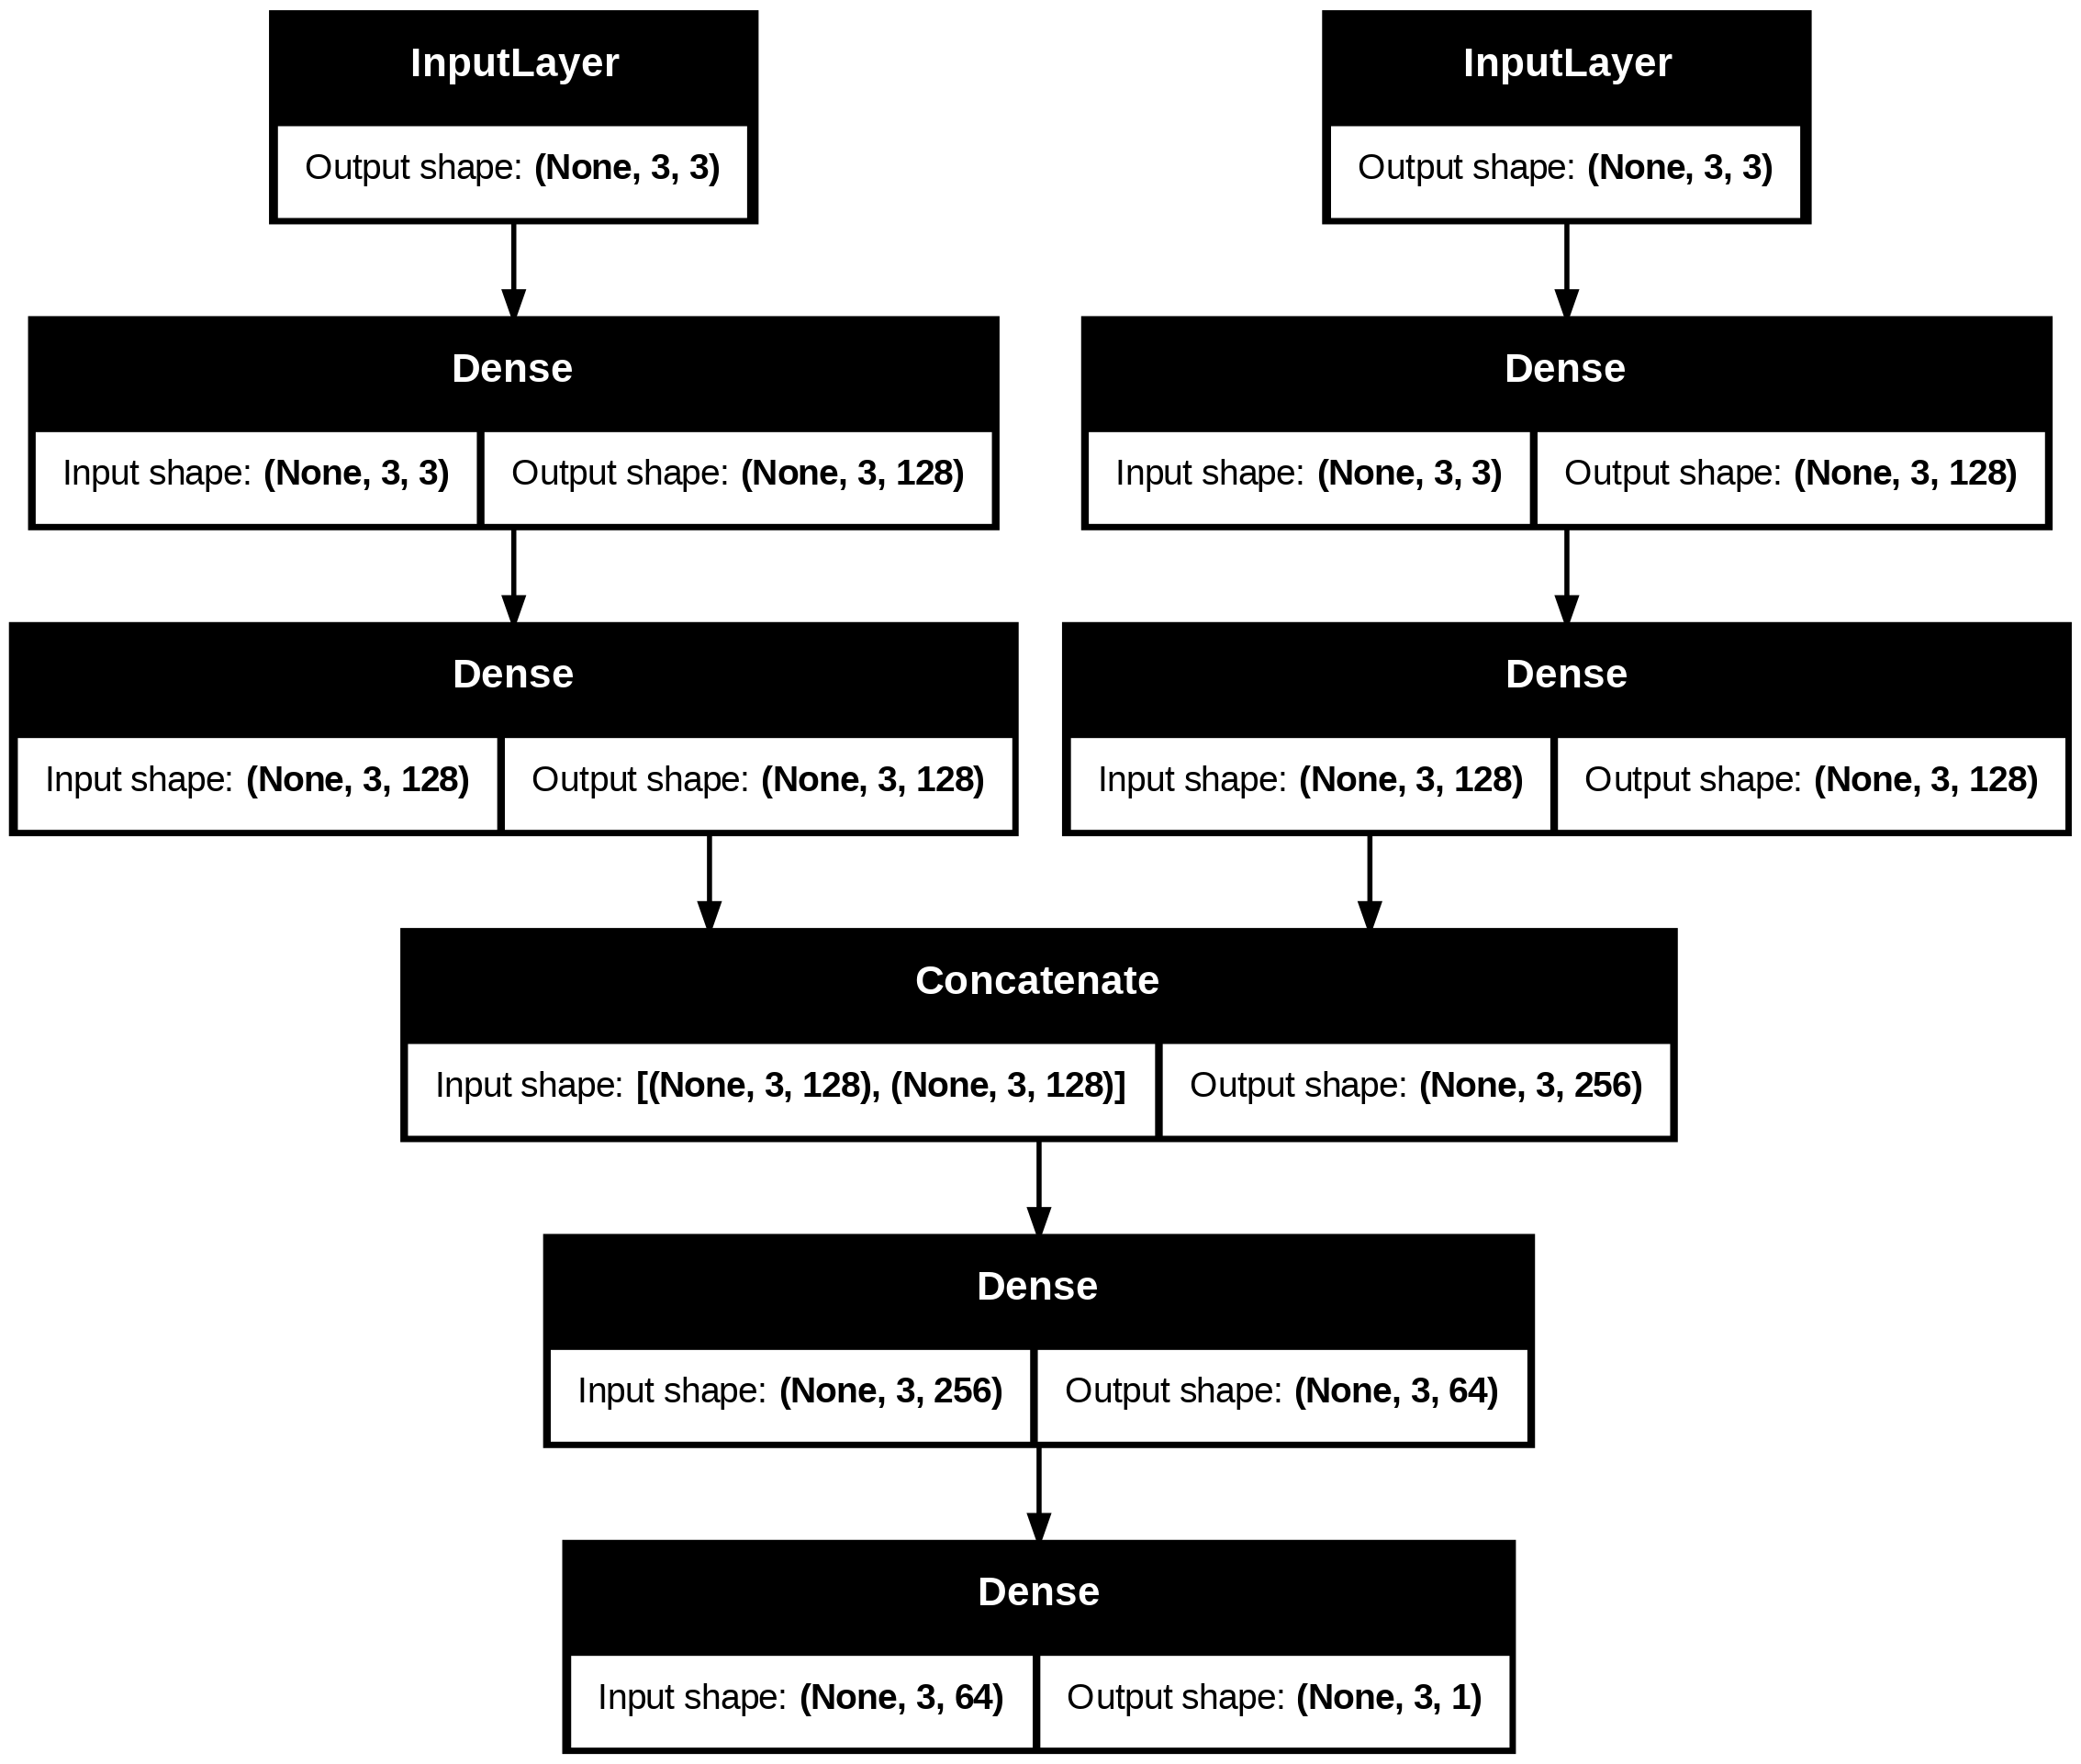

In [25]:
plot_model(model,show_shapes=True)